# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [2]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [3]:
# enter your code here

married_women_35_50 = da[(da['RIDAGEYR'] >= 35) & (da['RIDAGEYR'] <= 50) & (da['DMDMARTL'] == 1)]
non_married_women_35_50 = da[(da['RIDAGEYR'] >= 35) & (da['RIDAGEYR'] <= 50) & (da['DMDMARTL'] != 1)]

# 95% CI for the proportion of married females 35-50 who have completed college (compare to value above)
print('population proportion estimate for married women 35-50 who have completed college:')
print(sm.stats.proportion_confint(married_women_35_50[married_women_35_50['DMDEDUC2'] == 5].shape[0], married_women_35_50.shape[0]))
print('\n')

# 95% CI for the proportion of non-married females 35-50 who have completed college (compare to value above)
print('population proportion estimate for non-married women 35-50 who have completed college:')
print(sm.stats.proportion_confint(non_married_women_35_50[non_married_women_35_50['DMDEDUC2'] == 5].shape[0], non_married_women_35_50.shape[0]))

population proportion estimate for married women 35-50 who have completed college:
(0.30479236723368636, 0.36717131040536016)


population proportion estimate for non-married women 35-50 who have completed college:
(0.14911442856486243, 0.2122890802070674)


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

The range in the confidence intervals is larger among married women than it is for non-married women.

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

Our findings result in us being able to report with 95% confidence that the population proportion of married women who have completed college is between 30% and 36%, while the population proportion of non-married women who have completed college within 15% to 21%. 

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [4]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [5]:
# Rename columns
da["SMQ020"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["RIAGENDR"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

# Aggregate data
dx = da[["SMQ020", "RIAGENDR"]].dropna()
df = pd.crosstab(dx.SMQ020, dx.RIAGENDR)

# 95% CI for the proportion of females who smoke (compare to value above)
print('95% CI for the proportion of females who smoke:')
print(sm.stats.proportion_confint(df.iloc[1,0], df.iloc[:,1].sum()))
print('\n')

# 95% CI for the proportion of males who smoke (compare to value above)
print('95% CI for the proportion of males who smoke:')
print(sm.stats.proportion_confint(df.iloc[1,1], df.iloc[:,0].sum()))
print('\n')

# 95% CI for the difference in proportions between females and males who smoke (compare to value above)
print('95% CI for the difference in proportions between females and males who smoke:')
female_proportion = df.iloc[1,0]/ df.iloc[:,1].sum()
male_proportion = df.iloc[1,1]/ df.iloc[:,0].sum()
se_female = np.sqrt(female_proportion * (1 - female_proportion) / df.iloc[:,1].sum())
se_male = np.sqrt(male_proportion * (1 - male_proportion) / df.iloc[:,0].sum())
se_diff = np.sqrt(se_female**2 + se_male**2)

d = female_proportion - male_proportion
lcb = d - 2 * se_diff
ucb = d + 2 * se_diff
print((lcb, ucb))

95% CI for the proportion of females who smoke
(0.3115431397025402, 0.34664792459095783)


95% CI for the proportion of males who smoke
(0.4574830933781219, 0.4933917383850006)


95% CI for the difference in proportions between females and males who smoke
(-0.1719634233693363, -0.12072034410028816)


__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

Because the difference in gender proportions does not give us information about the size of the individual gender proportions.

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

It is slightly larger than the confidence intervals of the individual genders, because we are combining two statistics.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [6]:
# centimeters height
## Calucations Method
cent_mean = da.dropna(subset=['BMXHT']).agg({"BMXHT": np.mean}).values[0]
cent_std = da.dropna(subset=['BMXHT']).agg({"BMXHT": np.std}).values[0]
cent_size = da.dropna(subset=['BMXHT']).shape[0]

lcb_cent = float(cent_mean - 1.96 * cent_std / np.sqrt(cent_size))
ucb_cent = float(cent_mean + 1.96 * cent_std / np.sqrt(cent_size))
print('centimeters - calculations method:')
print((lcb_cent, ucb_cent))

## Statsmodels method
print('centimeters - stats models method:')
print(sm.stats.DescrStatsW(da['BMXHT'].dropna()).zconfint_mean())
print('\n')

# inches height
## Calucations Method
inches_df = da.copy()
inches_df['BMXHT'] = inches_df['BMXHT'].div(2.54)

inches_mean = inches_df.dropna(subset=['BMXHT']).agg({"BMXHT": np.mean}).values[0]
inches_std = inches_df.dropna(subset=['BMXHT']).agg({"BMXHT": np.std}).values[0]
inches_size = inches_df.dropna(subset=['BMXHT']).shape[0]

lcb_inches = float(inches_mean - 1.96 * inches_std / np.sqrt(inches_size))
ucb_inches = float(inches_mean + 1.96 * inches_std / np.sqrt(inches_size))
print('inches - calculations method:')
print((lcb_inches, ucb_inches))

## Statsmodels method
print('inches - stats models method:')
print(sm.stats.DescrStatsW(inches_df['BMXHT'].dropna()).zconfint_mean())

centimeters - calculations method
(165.8805464391246, 166.4051225190986)
centimeters - stats models method
(165.88055125872887, 166.40511769949427)


inches - calculations method
(65.30730174768685, 65.51382776342463)
inches - stats models method
(65.30730364516884, 65.51382586594264)


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

The relative scale of the confidence intervals is the same although the numbers for centimeters look bigger because centimeters are smaller than inches.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

             BMXBMI                                             
               mean                  std             size       
RIAGENDR     Female       Male    Female      Male Female   Male
AGEGRP                                                          
(8, 18]   26.394118  26.333333  7.184433  7.484392   70.0   63.0
(18, 28]  28.019433  27.058186  8.048854  6.679515  498.0  458.0
(28, 38]  29.943443  29.697180  7.959097  6.726690  494.0  467.0
(38, 48]  31.003733  29.514646  8.044642  6.104950  514.0  398.0
(48, 58]  30.787361  29.385132  7.647590  6.151534  454.0  419.0
(58, 68]  31.054664  29.232462  7.779502  5.959024  466.0  470.0
(68, 78]  30.537818  28.720270  6.780588  5.336652  279.0  307.0
(78, 88]  27.850000  27.464368  5.483781  4.695650  201.0  177.0


Text(0,0.5,'Female - male BMI difference')

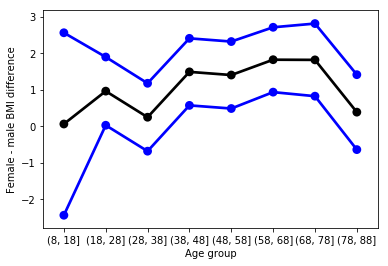

In [39]:
# enter your code here

# Calculate the mean, SD, and sample size for BMI within age/gender groups
da['AGEGRP'] = pd.cut(da['RIDAGEYR'],[8,18,28,38,48,58,68,78,88,98])
pr = da.groupby(["AGEGRP", "RIAGENDR"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()

print(pr)

# Calculate the SEM for females and for males within each age band
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"]) 
pr["BMXBMI", "sem", "Male"] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"]) 

# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2) 
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - 1.96 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + 1.96 * pr["BMXBMI", "sem_diff", ""] 

# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0])
pp = sns.pointplot(x, pr["BMXBMI", "mean_diff", ""], color='black')
sns.pointplot(x, pr["BMXBMI", "lcb_diff", ""], color='blue')
sns.pointplot(x, pr["BMXBMI", "ucb_diff", ""], color='blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male BMI difference")

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

The widths in the confidence intervals vary pretty drastically, this is likely due to the differences in sizes of the samples within each age band, and varying degrees of variation around the mean for each age band.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [40]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'AGEGRP'],
      dtype='object')

In [48]:
# BPXSY1
## Calucations Method
BPXSY1_mean = da.dropna(subset=['BPXSY1']).agg({"BPXSY1": np.mean}).values[0]
BPXSY1_std = da.dropna(subset=['BPXSY1']).agg({"BPXSY1": np.std}).values[0]
BPXSY1_size = da.dropna(subset=['BPXSY1']).shape[0]
BPXSY1_se = 1.96 * BPXSY1_std / np.sqrt(BPXSY1_size)

lcb_cent = float(BPXSY1_mean - BPXSY1_se)
ucb_cent = float(BPXSY1_mean + BPXSY1_se)
print('BPXSY1 - calculations method:')
print((lcb_cent, ucb_cent))

## Statsmodels method
print('BPXSY1 - stats models method:')
print(sm.stats.DescrStatsW(da['BPXSY1'].dropna()).zconfint_mean())
print('\n')

# BPXSY2
## Calucations Method
BPXSY2_mean = da.dropna(subset=['BPXSY2']).agg({"BPXSY2": np.mean}).values[0]
BPXSY2_std = da.dropna(subset=['BPXSY2']).agg({"BPXSY2": np.std}).values[0]
BPXSY2_size = da.dropna(subset=['BPXSY2']).shape[0]
BPXSY2_se = 1.96 * BPXSY2_std / np.sqrt(BPXSY2_size)

lcb_cent = float(BPXSY2_mean - BPXSY2_se)
ucb_cent = float(BPXSY2_mean + BPXSY2_se)
print('BPXSY2 - calculations method:')
print((lcb_cent, ucb_cent))

## Statsmodels method
print('BPXSY2 - stats models method:')
print(sm.stats.DescrStatsW(da['BPXSY2'].dropna()).zconfint_mean())
print('\n')

## Difference between the two means
sem_diff = np.sqrt(BPXSY1_se**2 + BPXSY2_se**2)
bmi_diff = BPXSY1_mean - BPXSY2_mean
lcb = bmi_diff - 2*sem_diff
ucb = bmi_diff + 2*sem_diff
print('95% confidence interval for difference in means of both blood pressure tests:')
print((lcb, ucb))

BPXSY1 - calculations method:
(124.59173366379677, 125.57749425695864)
BPXSY1 - stats models method:
(124.59174272058787, 125.57748520016754)


BPXSY2 - calculations method:
(124.2949241008532, 125.27111022615674)
BPXSY2 - stats models method:
(124.29493306967777, 125.27110125733216)


95% confidence interval for difference in means of both blood pressure tests:
(-1.0857255514897397, 1.6889191452352272)


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

Yes because it lies within our 95% confidence interval for the difference in means.

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The range for within subject differences shows that there is no consistency between one of the measurements resulting in higher readings than the other. This is because we see a negative lower bound and positive upper bound. The confidence interval for the difference is bigger than those for the single measurements.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [49]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'AGEGRP'],
      dtype='object')

In [66]:
smokers = sm.stats.DescrStatsW(da[da['SMQ020']=='Yes']['RIDAGEYR'])
non_smokers = sm.stats.DescrStatsW(da[da['SMQ020']=='No']['RIDAGEYR'])
print('CI for the difference of mean ages between smokers and non-smokers:')
print(sm.stats.CompareMeans(smokers,non_smokers).zconfint_diff())

CI for the difference of mean ages between smokers and non-smokers:
(5.880999402279489, 7.792516147607483)


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

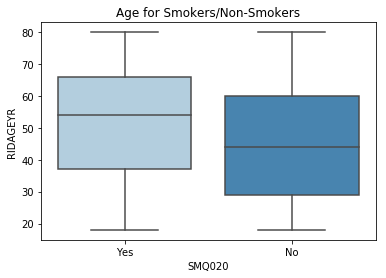

In [77]:
sns.boxplot( x=da["SMQ020"].dropna(), y=da["RIDAGEYR"].dropna(), palette="Blues").set_title('Age for Smokers/Non-Smokers')
plt.show()

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

It appears that non-smokers contributed more uncertainty to the mean difference calculation than smokers did.